In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Task
* нужно решить задачу классификации физических лиц по уровню дохода
* Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K,

In [2]:
data = pd.read_csv('C:\\Users\\spassiri\\adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Key findings:
* capital-gain & capital-loss low informative KPI as 92% of data has value equal to 0.
* hours per week concentrated around average value with some outliers
* education as well concentrated around average value.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [7]:
data['workclass'].unique() #found unmarked lines

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
data[data['workclass'] == '?'].count() # respectively low amount of rows, can be excluded

age                2799
workclass          2799
fnlwgt             2799
education          2799
educational-num    2799
marital-status     2799
occupation         2799
relationship       2799
race               2799
gender             2799
capital-gain       2799
capital-loss       2799
hours-per-week     2799
native-country     2799
income             2799
dtype: int64

In [17]:
data['fnlwgt'].unique()

array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64)

In [14]:
data['education'].unique() #ok

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [18]:
data['educational-num'].unique() #ok

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [19]:
data['marital-status'].unique() #ok

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [20]:
data['occupation'].unique() #found unmarked lines

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [28]:
data[data['occupation'] == '?'].count()

age                2809
workclass          2809
fnlwgt             2809
education          2809
educational-num    2809
marital-status     2809
occupation         2809
relationship       2809
race               2809
gender             2809
capital-gain       2809
capital-loss       2809
hours-per-week     2809
native-country     2809
income             2809
dtype: int64

In [21]:
data['relationship'].unique() #ok

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [22]:
data['race'].unique() #ok

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [23]:
data['gender'].unique() #ok

array(['Male', 'Female'], dtype=object)

In [24]:
data['capital-gain'].unique() # ok

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [31]:
 data[data['capital-gain']== 0].count()

age                44807
workclass          44807
fnlwgt             44807
education          44807
educational-num    44807
marital-status     44807
occupation         44807
relationship       44807
race               44807
gender             44807
capital-gain       44807
capital-loss       44807
hours-per-week     44807
native-country     44807
income             44807
dtype: int64

In [25]:
data['capital-loss'].unique() #ok

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754],
      dtype=int64)

In [32]:
 data[data['capital-loss']== 0].count()

age                46560
workclass          46560
fnlwgt             46560
education          46560
educational-num    46560
marital-status     46560
occupation         46560
relationship       46560
race               46560
gender             46560
capital-gain       46560
capital-loss       46560
hours-per-week     46560
native-country     46560
income             46560
dtype: int64

In [27]:
data['hours-per-week'].unique() #ok

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [26]:
data['native-country'].unique() #check

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [33]:
data[data['native-country'] =='?'].count()  # respectively low amount of rows, can be excluded

age                857
workclass          857
fnlwgt             857
education          857
educational-num    857
marital-status     857
occupation         857
relationship       857
race               857
gender             857
capital-gain       857
capital-loss       857
hours-per-week     857
native-country     857
income             857
dtype: int64

* workclass & occupation is logically critical for making prediction, so rows without info should be skipped

In [68]:
# filter not-null dataset
filtered = data[(data['workclass'] !='?') &(data['occupation'] !='?') &(data['native-country'] !='?')]

Text(0.5, 1.0, 'Age distribution ')

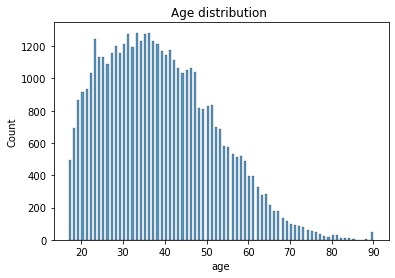

In [39]:
sns.histplot(data=filtered, x='age', binwidth=0.5).set_title('Age distribution ')

Text(0.5, 1.0, 'educational-num distribution ')

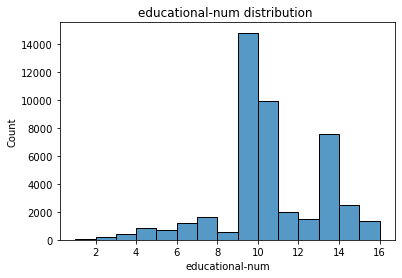

In [41]:
sns.histplot(data=filtered, x='educational-num', binwidth=1).set_title('educational-num distribution ')

Text(0.5, 1.0, 'hours-per-week distribution ')

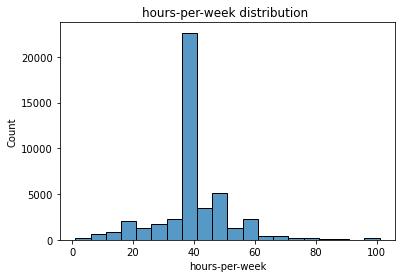

In [46]:
sns.histplot(data=filtered, x='hours-per-week', binwidth=5).set_title('hours-per-week distribution ')

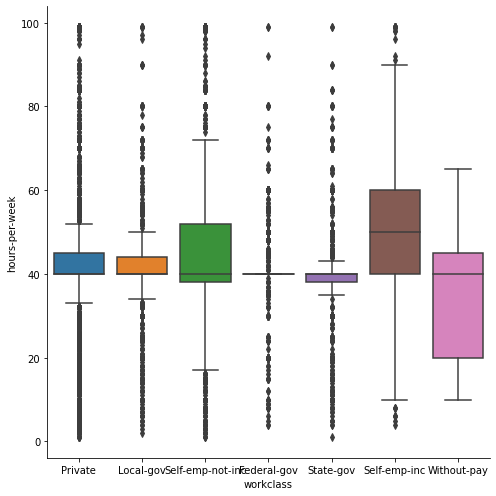

In [106]:
#sns.displot(filtered, x="hours-per-week", col="workclass")
ax = sns.catplot(x="workclass", y="hours-per-week", data=filtered, kind="box",height=7)

### Key Findings:
* age distribution in dataset close to normal but a bit shifted to left
* all workclasses on average works close to 40 hours per week


In [72]:
filtered_dum = pd.get_dummies (filtered, columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country' ])

In [76]:
# Move target KPI to another table
target = filtered_dum['income'].copy()

In [84]:
target = target.reset_index()

In [85]:
target

,index,income
0,0,<=50K
1,1,<=50K
2,2,>50K
3,3,>50K
4,5,<=50K
...,...,...
45217,48837,<=50K
45218,48838,>50K
45219,48839,<=50K
45220,48840,<=50K


In [80]:
#target KPI income removed from dataset
del filtered_dum['income']
filtered_dum.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
# from category data type to binominal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
le.fit(target['income'])

LabelEncoder()

In [87]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [88]:
le.transform( ['<=50K', '>50K']) # пример расшифровки

array([0, 1])

In [89]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series (data = le.transform(target['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [90]:
X = filtered_dum

In [93]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [98]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [100]:
model.score(X_train, y_train) 

0.7904469690687453

In [101]:
model.score(X_test,y_test)

0.7954671088999448

# Метод опорных векторов. SVM.

In [102]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [103]:
clf.score(X_train, y_train) 

0.8586118251928021

In [104]:
clf.score(X_test, y_test)

0.8512990602542841

### Conclusion:
* Данные очищены от пропусков, т.к. пропуски в контексте задачи не могут быть заменены вручную, но можно спрогнозировать их и положить их в модель. В проценте от всей выборки строки с пропусками достаточно малы.
* Категориальные данные переведены в числовой формат
* Для обучения выборка разделена в пропорции 20%/80%
* Модель опорных векторов показала более точный результат предсказания
* Для улучшения точности прогнозирования можно более детально погрузиться во взаимосвязи в данных, выявить факторы, которые более сильно влияют на уровень дохода, а также нормировать переменную fnlwgt, т.к. у нее слишком больше значения.